In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

PATH = os.getcwd()
PATH

'/home/andre/Documents/Git/CONTROLE_DCA3701.X/Unidade_01'

# Laboratório 1B

In [9]:
data = pd.read_csv(PATH+'/Observacoes.txt', sep='\t')

data

,ALTURA(CM),1. EXP,2. EXP,3. EXP,4. EXP,5. EXP
0,5,0.705,0.6982,0.7611,0.7665,0.7256
1,10,1.560,1.5137,1.5540,1.5320,1.5260
2,15,2.444,2.3740,2.3540,2.3430,2.3330
3,20,3.145,3.1550,3.1620,3.1620,3.1540
4,25,3.975,3.9580,3.9430,3.9340,3.9420


In [10]:
exp_5cm = np.array([0.705, 0.6982, 0.7611, 0.7665, 0.7256])
exp_10cm = np.array([1.560, 1.5137, 1.5540, 1.5320, 1.5260])
exp_15cm = np.array([2.444, 2.3740, 2.3540, 2.3430, 2.3330])
exp_20cm = np.array([3.145, 3.1550, 3.1620, 3.1620, 3.1540])
exp_25cm = np.array([3.975, 3.9580, 3.9430, 3.9340, 3.9420])

mean_exp = np.array([np.mean(exp_5cm), np.mean(exp_10cm), np.mean(exp_15cm), np.mean(exp_20cm), np.mean(exp_25cm)])

mean_exp

array([0.73128, 1.53714, 2.3696 , 3.1556 , 3.9504 ])

intercept: 0.42464113988816266
slope:6.2054385381291235



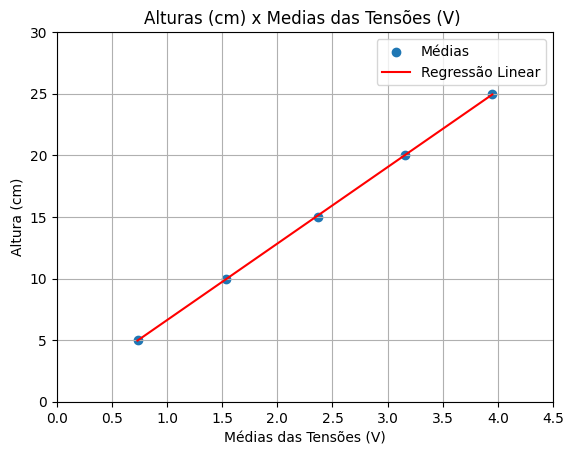

In [11]:
alturas = np.array([5, 10, 15, 20, 25])

res = stats.linregress(mean_exp, alturas)

print(f'intercept: {res.intercept}\nslope:{res.slope}\n')

plt.scatter(mean_exp, alturas, label="Médias")
plt.plot(mean_exp, res.intercept + res.slope*mean_exp, 'r', label='Regressão Linear')

plt.title("Alturas (cm) x Medias das Tensões (V) ")
plt.xlabel("Médias das Tensões (V)")
plt.ylabel("Altura (cm)")
plt.xlim([0, 4.5])
plt.ylim([0, 30])
plt.grid()
plt.legend()

plt.savefig("Grafico_exp_1B.png")

plt.show()

# Laboratório 1C

Area do Tanque (A1 [cm2]): 15.517916547360871
Area do Orificio de saida (a1 [cm2]): 0.17813934812021404
Media dos Tempos:
[35.526  26.61   21.492  17.676  15.222  13.518  12.214  11.102  10.256
  9.5184  8.8652]



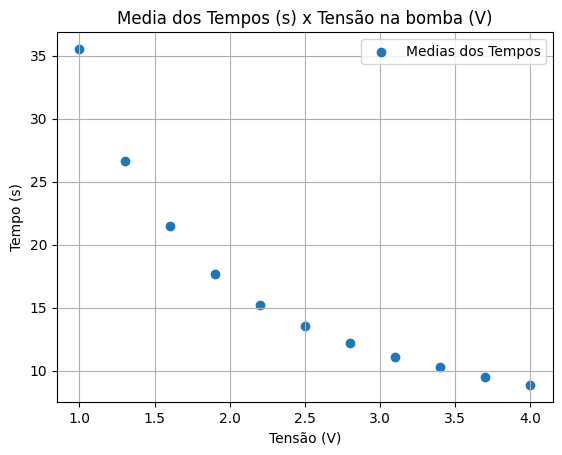

In [12]:
# Diametro interno do Tanque
D_cm = 4.445
A1 = np.pi * (D_cm/2)**2
print(f"Area do Tanque (A1 [cm2]): {A1}")
# Diametro do orificio de saida
d_cm = 0.47625
a1 = np.pi * (d_cm/2)**2
print(f"Area do Orificio de saida (a1 [cm2]): {a1}")
# Velocidade da gravidade
g_m2_s = 9.81
g_cm2_s = 98100

# Nível do tanque
L1 = h_cm = 26

# Tensões aplicadas na bomba
tensao = np.arange(1., 4.3, 0.3)

# Leituras dos tempos
# Nomeclatura da variavel:
# tempo_[QualExperimento]_[TensaoNaBomba]_[unidade]
tempo_1_1V_s = np.array([36.81, 36.62, 34.64, 34.5, 35.06])
tempo_2_13V_s = np.array([27.45, 25.89, 26.29, 26.25, 27.17])
tempo_3_16V_s = np.array([22.94, 21.49, 20.93, 21.23, 20.87])
tempo_4_19V_s = np.array([18.8, 17.25, 17.59, 17.45, 17.29])
tempo_5_22V_s = np.array([16.31, 14.96, 14.94, 14.92, 14.98])
tempo_6_25V_s = np.array([14.36, 13.27, 13.29, 13.29, 13.38])
tempo_7_28V_s = np.array([13.09, 12.02, 12.02, 11.93, 12.01])
tempo_8_31V_s = np.array([11.89, 10.9, 10.93, 10.91, 10.88])
tempo_9_34V_s = np.array([10.95, 10.05, 10.08, 10.05, 10.15])
tempo_10_37V_s = np.array([10.15, 9.344, 9.362, 9.43, 9.306])
tempo_11_4V_s = np.array([9.368, 8.752, 8.724, 8.756, 8.726])

media_dos_tempos = np.array([np.mean(tempo_1_1V_s), np.mean(tempo_2_13V_s), np.mean(tempo_3_16V_s),
                            np.mean(tempo_4_19V_s), np.mean(tempo_5_22V_s), np.mean(tempo_6_25V_s),
                            np.mean(tempo_7_28V_s), np.mean(tempo_8_31V_s), np.mean(tempo_9_34V_s),
                            np.mean(tempo_10_37V_s), np.mean(tempo_11_4V_s)])

print(f"Media dos Tempos:\n{media_dos_tempos}\n")

plt.scatter(tensao, media_dos_tempos, label="Medias dos Tempos")

plt.grid()
plt.title("Media dos Tempos (s) x Tensão na bomba (V)")
plt.xlabel("Tensão (V)")
plt.ylabel("Tempo (s)")
plt.legend()

plt.savefig("Grafico_tempo_tensao_EXP_1C.png")

plt.show()

$ F_{in} = K_m \cdot V_p$
<br>
* $F_{in}$: Vazao de entrada [$cm^3/s$]
* $Vp$: Alimentação da bomba [$V$]
* $Km$: Constante da Bomba

In [21]:
# Fin = Km * Vp
# Fin: Vazao de entrada
# Vp: Alimentação da bomba
# Km: Constante da Bomba

Vp = tensao

Fin = (np.pi * (D_cm/2)**2 * h_cm) /  media_dos_tempos

Km = Fin / Vp
Km_medio = np.mean(Km)

print(f"Vazao media (Fm [cm3/s]): {Fin}\n")
print(f'Km\'s: {Km}\n\nKm médio: {Km_medio}')

Vazao media (Fm [cm3/s]): [11.35691691 15.16218828 18.77283781 22.82562968 26.50544148 29.84656238
 33.0330629  36.34172494 39.33949203 42.38798855 45.51119323]

Km's: [11.35691691 11.66322176 11.73302363 12.01348931 12.04792795 11.93862495
 11.79752246 11.72313708 11.57043883 11.45621312 11.37779831]

Km médio: 11.698028573155248


$v_{out} = a_1 * L_1$
<br>
* $v_{out}$: Velocidade de saída do fluido [$cm/s$]
* $a_1$: Área do orifício de saída [$cm^2$]
* $L_1$: Nível da água do tanque [$cm$]

$F_{out} = a_1 \cdot v_{out}$
<br>
* $F_{out}$: Vazão de saída [$cm^3/2$]
* $a_1$: Área do orifício de saída [$cm^2$]
* $v_{out}$: Velocidade de saída do fluido [$cm/s$]

In [22]:
# Fout: Vazao de saida
# vout: velocidade de saida do liquido
vout = np.sqrt(2*g_cm2_s*L1)
Fout = a1 * vout

print(f"Velocidade de saida (vout [cm/s]): {vout}")
print(f"Vazao de saida (Fout [cm3/s]: {Fout}")

Velocidade de saida (vout [cm/s]): 2258.5836269662454
Vazao de saida (Fout [cm3/s]: 402.34261498275566


$\dot V = F_{in} - F_{out}$
<br>
* $\dot V$: Taxa de variação volumétrica [$cm^3/s$]
<br>
---
$\dot L = \frac{\dot V}{A_1}$
<br>
<br>
$\dot L = -\frac{a_1}{A_1} \sqrt{2 \cdot g \cdot L1} + \frac{K_m}{A_1} \cdot V_p$
<br>
* $\dot L$: Taxa de variação do nível do tanque [$cm/s$]
* $L_1$: Nível do tanque [$cm/s$]
* $A_1$: Área interna do tanque [$cm^2$]
* $a_1$: Área do orificio de saída [$cm^2$]
* $g$: Aceleração da gravidade [$cm^2$/s]

In [24]:
L_taxa = - a1 / A1 * np.sqrt(2*g_cm2_s*L1) + Km_medio / A1 * Vp
print(f"Taxa de L: {L_taxa}")

Taxa de L: [-25.17377801 -24.94762597 -24.72147392 -24.49532188 -24.26916983
 -24.04301779 -23.81686574 -23.59071369 -23.36456165 -23.1384096
 -22.91225756]
